In [105]:
import matplotlib.pyplot as plt # for plotting
import numpy as np
import csv

from __future__ import print_function
from __future__ import division

# **HW9 - Digital Signal Processing for Mechatronics**
https://github.com/ndm736/ME433_2023/wiki/HW9
Noisy data: sigA,sigB, sigD, Square Wave: sigC
### **DSP Methods**
#### Fast Fourier Transform
- The Fast Fourier Transform is an algorithm that identifies the magnitude of frequencies in a signal, from 0Hz to half of the sampling frequency, called the Nyquist Frequency
- FFT returns the magnitude at specific frequencies, but you cannot interpolate the magnitude between frequencies
    - Generate a figure with a subplot of the signal vs time and a subplot of the FFT of each CSV
#### Moving Average filter: 
- Let's start by low-pass filtering the data with a moving average filter. Write a loop that averages the last X number of data points and saves the result in a new list
#### IIR filter
- Write a loop that adds a value into the average with the two weights A and B, so that new_average[i] = A * new_average[i-1] + B * signal[i]. Note that A+B=1, otherwise the signal will get bigger with time (A+B>1) or go to 0 (A+B<1)
#### FIR filter
- In an FIR filter you remember that last X number of samples, and sum them with unique weights to create the filtered output, like a combination of the MAF and IIR
- Choose a cutoff frequency and use the Low-pass sinc, and try a few different cutoff frequencies, bandwidths, and window types.
- Write a loop to apply the weights, compare the filtered and unfiltered signals, and compare the FFTs.
- https://fiiir.com/

In [96]:
### Import all signal datasets, 
def importsig(filename): # imports 2-column csv, returns 2 column vectors
    t = [] # column 0
    sig = [] # column 1
    with open(filename) as f:
        # open the csv file
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            t.append(float(row[0])) # leftmost column
            sig.append(float(row[1])) # second column
    return np.array(t), np.array(sig)

def plotsig(t, sig): # easy formatted plot to check data
    fig, ax = plt.subplots()
    plt.plot(t,sig)
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    plt.title('Signal vs Time')
    plt.show()

tA, sigA = importsig('sigA.csv')
tB, sigB = importsig('sigB.csv')
tC, sigC = importsig('sigC.csv')
tD, sigD = importsig('sigD.csv')

# sample rate = number of data points / total time of samples
FsA = len(tA)/tA[-1]
FsB = len(tB)/tB[-1]
FsC = len(tC)/tC[-1]
FsD = len(tD)/tD[-1]
print(FsA, FsB, FsC, FsD)

10000.20000400008 3300.2000121219467 2500.1250062503127 400.0833506980621


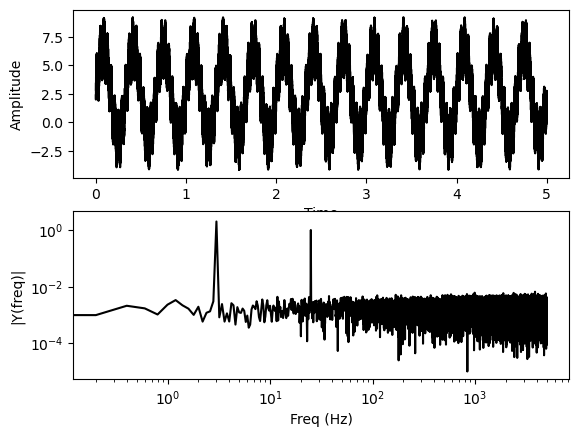

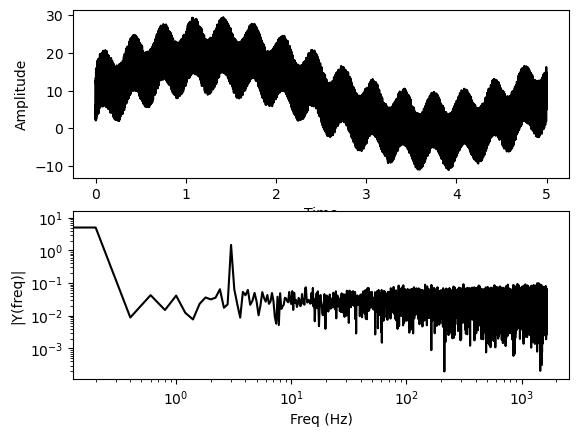

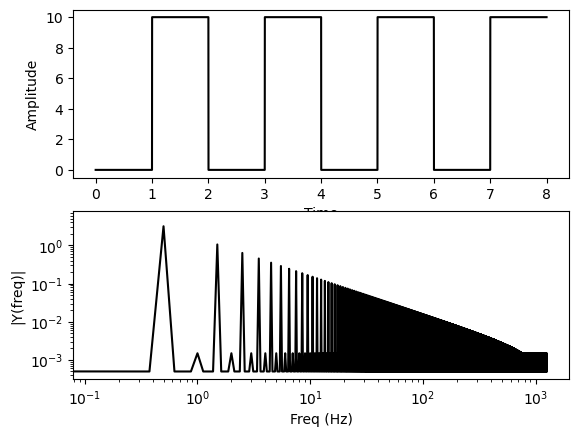

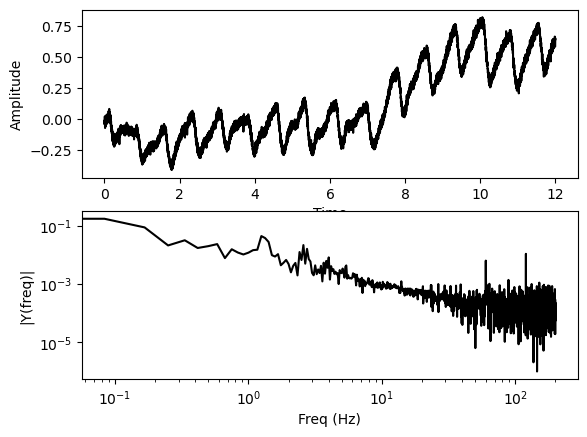

In [71]:
### Fast Fourier Transforms 
def genFFT(t, sig):
    n = len(sig) # length of the signal
    Fs = n/t[-1]  # sample rate
    k = np.arange(n)
    T = n/Fs
    # frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(sig)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    return frq, Y

def plotFFT(t, sig):
    frq, Y = genFFT(t, sig)
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,sig,'black')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'black') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.show()

plotFFT(tA, sigA)
plotFFT(tB, sigB)
plotFFT(tC, sigC)
plotFFT(tD, sigD)

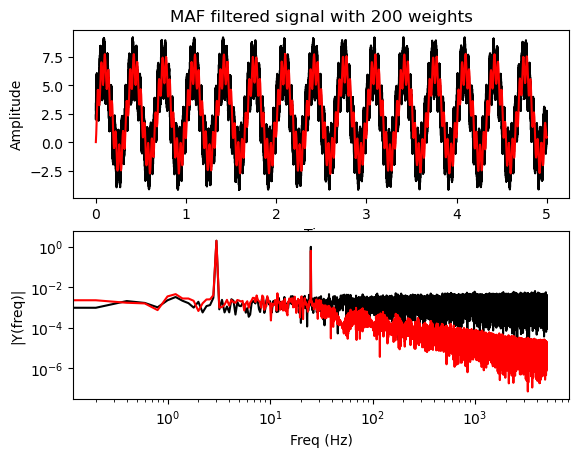

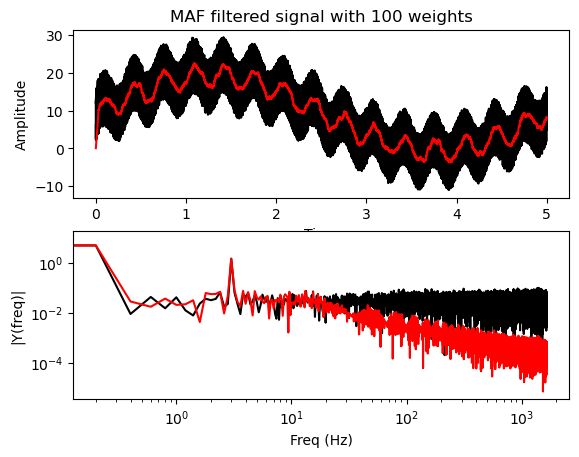

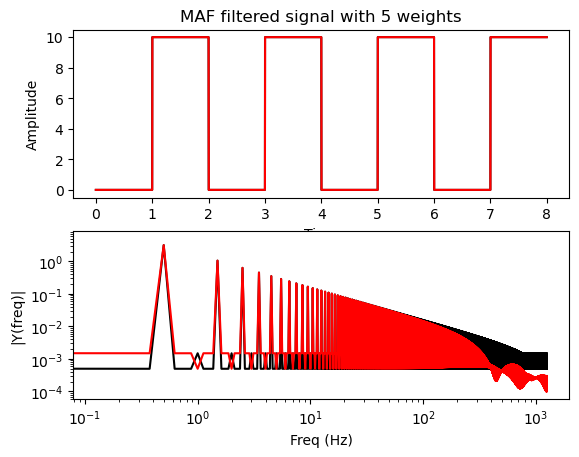

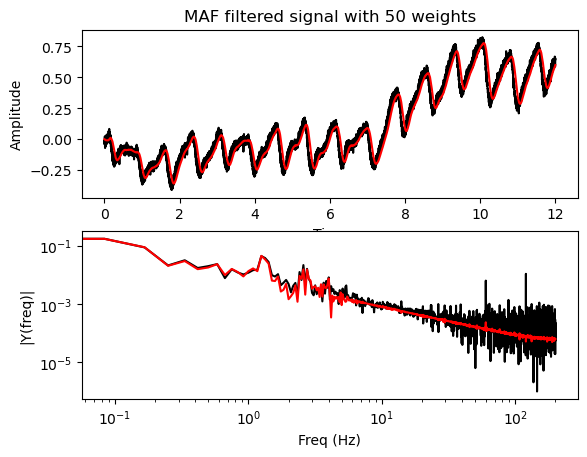

In [119]:
### Moving Average Filter (MAF)
# low-pass filter

def MAF(signal, m):
    n = len(signal)
    filtered = np.zeros(n)

    bubble = np.zeros(m)
    for i in range(0,n):
        bublocal = bubble.copy()
        bublocal[0] = signal[i]
        for j in range(1,m):
            bublocal[j] = bubble[j-1]
        bubble = bublocal
        sig_avg = np.average(bubble)
        filtered[i] = sig_avg
    return filtered

def plotMAFFFT(t, sig, m):
    frq, Y = genFFT(t, sig)
    filt = MAF(sig, m)
    filt_frq, filt_Y = genFFT(t, filt)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    # plotting unfiltered singal & fft
    ax1.plot(t,sig,'black')
    ax2.loglog(frq,abs(Y),'black') 
    # plotting filtered singal & fft
    ax1.plot(t,filt,'red')
    ax2.loglog(filt_frq, abs(filt_Y),'red') # plotting the fft
    
    ax1.set_title('MAF filtered signal with '+ str(m)+' weights')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    plt.show()

plotMAFFFT(tA, sigA, 200)
plotMAFFFT(tB, sigB, 100)
plotMAFFFT(tC, sigC, 5)
plotMAFFFT(tD, sigD, 50)

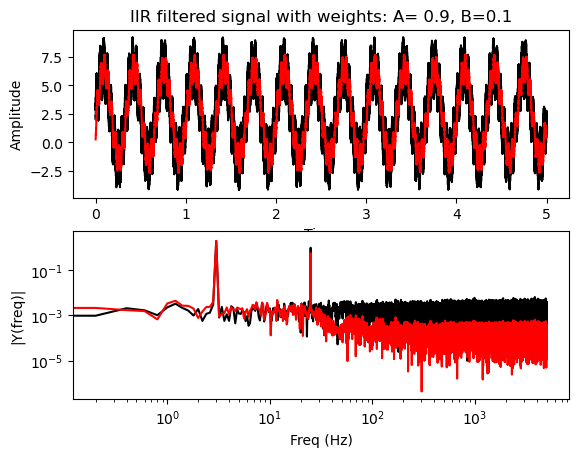

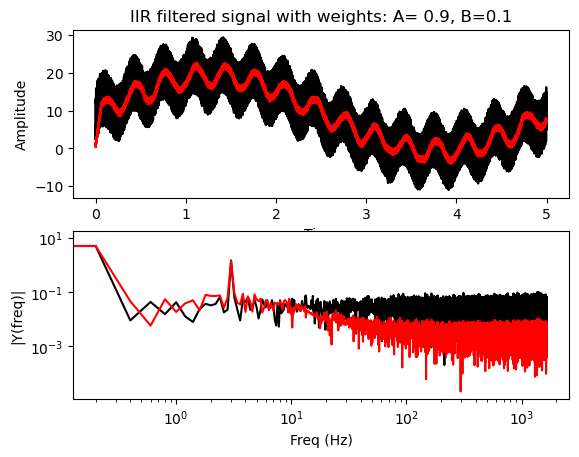

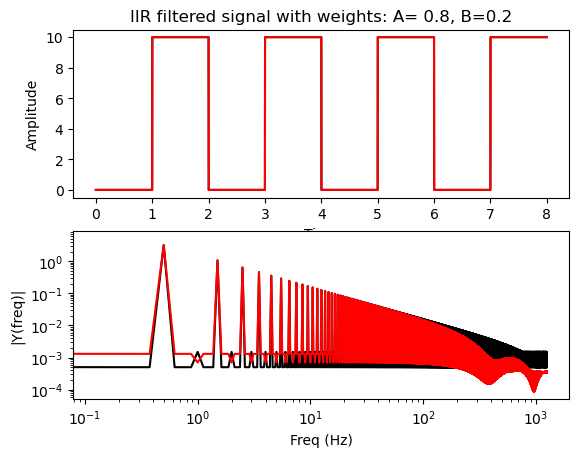

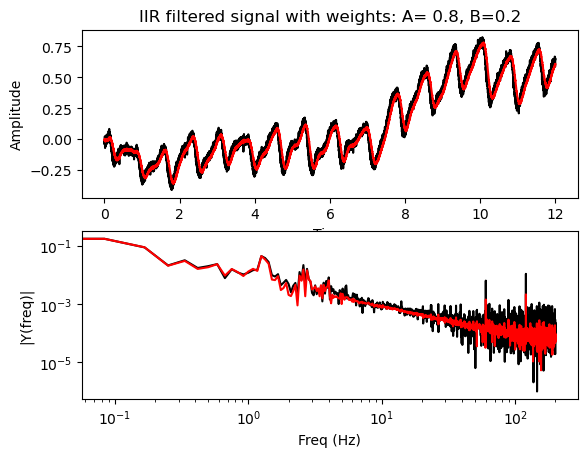

In [95]:
### IIR

def IIR(signal, m, A, B): # A+B=1
    n = len(signal)
    filtered = np.zeros(n)
    bubble = np.zeros(m)
    for i in range(0,n):
        bublocal = bubble.copy()
        bublocal[0] = signal[i]
        for j in range(1,m):
            bublocal[j] = bubble[j-1]
        bubble = bublocal
        sig_avg = np.average(bubble)
        filtered[i] = A*sig_avg + B*signal[i]
    return filtered

def plotIIRFFT(t, sig, m, A, B):
    frq, Y = genFFT(t, sig)
    filt = IIR(sig, m, A, B)
    filt_frq, filt_Y = genFFT(t, filt)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    # plotting unfiltered singal & fft
    ax1.plot(t,sig,'black')
    ax2.loglog(frq,abs(Y),'black') 
    # plotting filtered singal & fft
    ax1.plot(t,filt,'red')
    ax2.loglog(filt_frq, abs(filt_Y),'red') # plotting the fft
    
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax1.set_title('IIR filtered signal with weights: A= '+ str(A)+', B='+str(B))
    plt.show() 

plotIIRFFT(tA, sigA, 200, 0.9, 0.1) 
plotIIRFFT(tB, sigB, 200, 0.9, 0.1) 
plotIIRFFT(tC, sigC, 5, 0.8, 0.2) 
plotIIRFFT(tD, sigD, 50, 0.8, 0.2) 

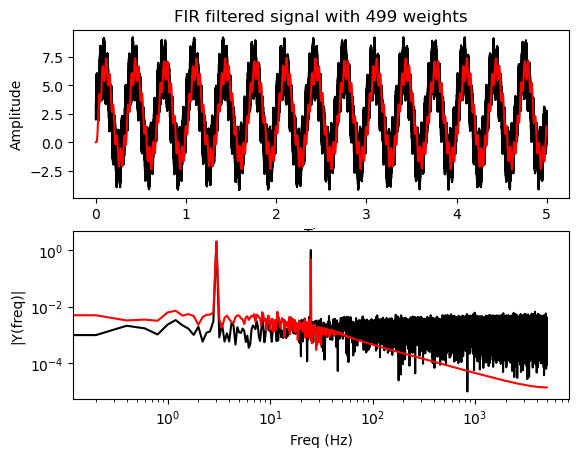

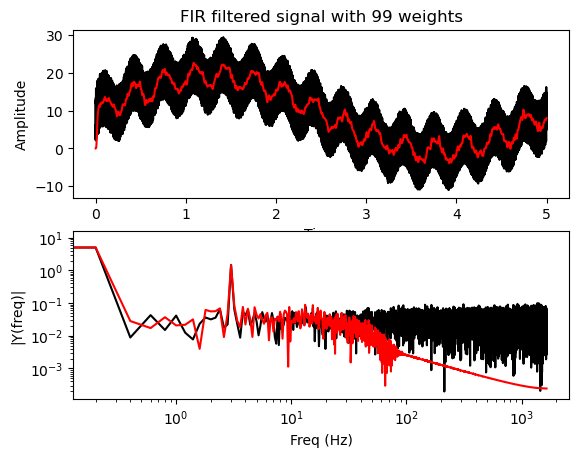

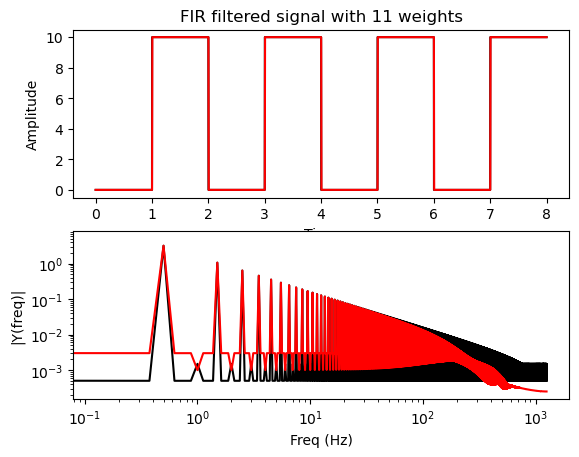

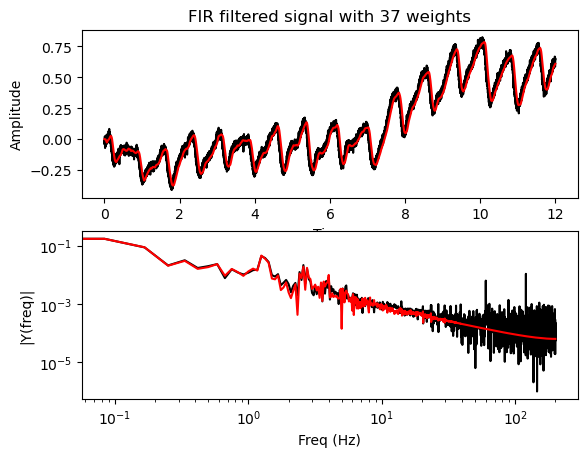

In [118]:
### FIR
def FIIR_LP(fS, fL, N): 
    # https://fiiir.com/ 
    # Example code, computes the coefficients of a low-pass windowed-sinc filter.
    if (N%2) == 0: # ensure N is odd
        N += 1
    # Compute sinc filter.
    h = np.sinc(2 * fL / fS * (np.arange(N) - (N - 1) / 2))

    # Apply window.
    h *= np.blackman(N)

    # Normalize to get unity gain.
    h /= np.sum(h)
    # Applying the filter to a signal s can be as simple as writing
    # s = np.convolve(s, h)
    return h

def FIR(signal, h): # A+B=1
    n = len(signal)
    filtered = np.zeros(n)
    m = len(h)
    bubble = np.zeros(m)
    for i in range(0,n):
        bublocal = bubble.copy()
        bublocal[0] = signal[i]
        for j in range(1,m):
            bublocal[j] = bubble[j-1]
        bubble = bublocal
        filtered[i] = np.sum(bubble*h)
    return filtered

def plotFIRFFT(t, sig, h):
    frq, Y = genFFT(t, sig)
    filt = FIR(sig, h)
    filt_frq, filt_Y = genFFT(t, filt)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    # plotting unfiltered singal & fft
    ax1.plot(t,sig,'black')
    ax2.loglog(frq,abs(Y),'black') 
    # plotting filtered singal & fft
    ax1.plot(t,filt,'red')
    ax2.loglog(filt_frq, abs(filt_Y),'red') # plotting the fft
    
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    ax1.set_title('FIR filtered signal with ' + str(len(h)) +' weights' )
    plt.show() 


#Sampling Rate (A,B,C,D) [Hz]: 10000 3300 2500 400

# SA = 10000 Hz, fl 100 hz, bl 1300 hz
# SB = 3300 Hz, fl 33 hz, bl 429 hz
# SC = 2500 Hz, fl 33 hz, bl 429 hz
# SD = 400 Hz, fl 14 hz, bl 182 hz
hA = FIIR_LP(FsA, 10, 499)
hB = FIIR_LP(FsB, 10, 99)
hC = FIIR_LP(FsC, 25, 10)
hD = FIIR_LP(FsD, 14, 37)

plotFIRFFT(tA, sigA, hA)
plotFIRFFT(tB, sigB, hB)
plotFIRFFT(tC, sigC, hC)
plotFIRFFT(tD, sigD, hD)

[-7.50312827e-19  1.53658410e-04  6.49144907e-04  1.56550640e-03
  3.01120089e-03  5.10918324e-03  7.97617183e-03  1.16988667e-02
  1.63105382e-02  2.17715772e-02  2.79572546e-02  3.46551086e-02
  4.15731699e-02  4.83588070e-02  5.46265244e-02  5.99917761e-02
  6.41069514e-02  6.66952808e-02  6.75785587e-02  6.66952808e-02
  6.41069514e-02  5.99917761e-02  5.46265244e-02  4.83588070e-02
  4.15731699e-02  3.46551086e-02  2.79572546e-02  2.17715772e-02
  1.63105382e-02  1.16988667e-02  7.97617183e-03  5.10918324e-03
  3.01120089e-03  1.56550640e-03  6.49144907e-04  1.53658410e-04
 -7.50312827e-19]
